In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

# set seaborn theme
sns.set_theme()

# set seaborn style
sns.set_style("whitegrid")

# set seaborn palette
sns.set_palette("colorblind")

import glob
import json
import os

In [2]:
# load data from data/*.json 
data = []

for fname in glob.glob('data/*.json'):    
    with open(fname) as f:
        d = json.load(f)
        d['filename'] = './'+fname
        data.append(d)
    
df = pd.json_normalize(data)
df

,task,date,filename,trace.events,config.model,config.max_steps,config.temperature,config.scenario,analysis.attempted_invocations,analysis.successful_invocations,...,analysis.completed,analysis.reached_accepting_state,analysis.termination_message,analysis.tool_stats.success_count.Serving,analysis.tool_stats.success_count.Mixing,analysis.tool_stats.success_count.Closet,analysis.tool_stats.success_count.Conclude,analysis.tool_stats.error_count.Closet,analysis.final_state_name,analysis.tool_stats.error_count.Mixing
0,Make me a cereal bowl with milk,2023-05-02T19:44:38.748015178+00:00,./data/trial_15147329566827567350.json,"[{'type': 'Start', 'task': 'Make me a cereal b...",gpt-3.5-turbo,10,0.0,Scenario0,8,7,...,True,True,The cereal bowl with milk is ready to serve.,1.0,2,3.0,1,1.0,Served,NaN
1,Make me a cereal bowl with milk,2023-05-02T20:03:56.997553047+00:00,./data/trial_171949858944690148.json,"[{'type': 'Start', 'task': 'Make me a cereal b...",gpt-3.5-turbo,10,0.0,Scenario0,6,4,...,True,False,Please provide more information on what type o...,NaN,3,NaN,1,NaN,NoBowlNoCerealNoMilk,2.0


In [3]:
df.set_index(['config.scenario', 'task', 'filename'], inplace=True)

Text(0, 0.5, 'count')

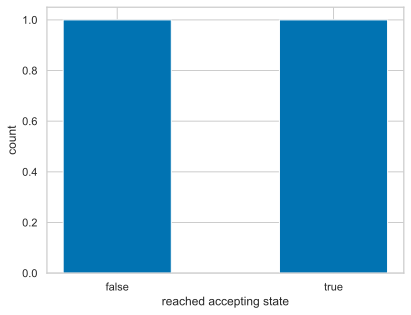

In [4]:
# plot histogram of reached accepting state - center bars
df['analysis.reached_accepting_state'].astype(float).hist(bins=2, align='mid', rwidth=0.5)
# false/true labels
plt.xticks([0.25, 0.75], ['false', 'true'])
plt.xlabel('reached accepting state')
plt.ylabel('count')


In [5]:
df

date   
config.scenario task                            filename                                                                      
Scenario0       Make me a cereal bowl with milk ./data/trial_15147329566827567350.json  2023-05-02T19:44:38.748015178+00:00  \
                                                ./data/trial_171949858944690148.json    2023-05-02T20:03:56.997553047+00:00   

                                                                                                                             trace.events   
config.scenario task                            filename                                                                                    
Scenario0       Make me a cereal bowl with milk ./data/trial_15147329566827567350.json  [{'type': 'Start', 'task': 'Make me a cereal b...  \
                                                ./data/trial_171949858944690148.json    [{'type': 'Start', 'task': 'Make me a cereal b...   

                                                                                         config.model   
config.scenario task                            filename                                                
Scenario0       Make me a cereal bowl with milk ./data/trial_15147329566827567350.json  gpt-3.5-turbo  \
                                                ./data/trial_171949858944690148.json    gpt-3.5-turbo   

                                                                                        config.max_steps   
config.scenario task                            filename                                                   
Scenario0       Make me a cereal bowl with milk ./data/trial_15147329566827567350.json                10  \
                                                ./data/trial_171949858944690148.json                  10   

                                                                                        config.temperature   
config.scenario task                            filename                                                     
Scenario0       Make me a cereal bowl with milk ./data/trial_15147329566827567350.json                 0.0  \
                                                ./data/trial_171949858944690148.json                   0.0   

                                                                                        analysis.attempted_invocations   
config.scenario task                            filename                                                                 
Scenario0       Make me a cereal bowl with milk ./data/trial_15147329566827567350.json                               8  \
                                                ./data/trial_171949858944690148.json                                 6   

                                                                                        analysis.successful_invocations   
config.scenario task                            filename                                                                  
Scenario0       Make me a cereal bowl with milk ./data/trial_15147329566827567350.json                                7  \
                                                ./data/trial_171949858944690148.json                                  4   

                                                                                        analysis.tokens.prompt_tokens   
config.scenario task                            filename                                                                
Scenario0       Make me a cereal bowl with milk ./data/trial_15147329566827567350.json                          22158  \
                                                ./data/trial_171949858944690148.json                            14500   

                                                                                        analysis.tokens.completion_tokens   
config.scenario task                            filename                                                                    
Scenario0       Make me a cereal 

<Axes: xlabel='analysis.tokens.prompt_tokens', ylabel='analysis.tokens.completion_tokens'>

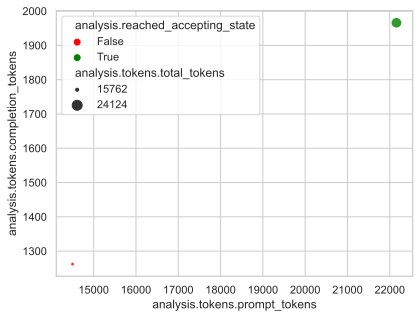

In [6]:
# scatterplot with analysis.tokens.prompt_tokens as x-axis and 
# analysis.tokens.completion_tokens as y-axis  
# analysis.reached_accepting_state as color - True: green, False: red
# analysis.tokens.total_tokens as size

sns.scatterplot(
    data=df,
    x='analysis.tokens.prompt_tokens',
    y='analysis.tokens.completion_tokens',
    hue='analysis.reached_accepting_state',
    size='analysis.tokens.total_tokens',
    sizes=(10, 100),
    alpha=0.8,
    palette=['red', 'green'],
)




In [7]:
# find the states the model reached
failed_trials_df = df[df['analysis.reached_accepting_state'] == False]
failed_trials_df

,,,date,trace.events,config.model,config.max_steps,config.temperature,analysis.attempted_invocations,analysis.successful_invocations,analysis.tokens.prompt_tokens,analysis.tokens.completion_tokens,analysis.tokens.total_tokens,analysis.completed,analysis.reached_accepting_state,analysis.termination_message,analysis.tool_stats.success_count.Serving,analysis.tool_stats.success_count.Mixing,analysis.tool_stats.success_count.Closet,analysis.tool_stats.success_count.Conclude,analysis.tool_stats.error_count.Closet,analysis.final_state_name,analysis.tool_stats.error_count.Mixing
config.scenario,task,filename,,,,,,,,,,,,,,,,,,,,
Scenario0,Make me a cereal bowl with milk,./data/trial_171949858944690148.json,2023-05-02T20:03:56.997553047+00:00,"[{'type': 'Start', 'task': 'Make me a cereal b...",gpt-3.5-turbo,10,0.0,6,4,14500,1262,15762,True,False,Please provide more information on what type o...,NaN,3,NaN,1,NaN,NoBowlNoCerealNoMilk,2.0


In [8]:
# pick the first failed trial
failed_trial_filename = failed_trials_df.reset_index().iloc[0]['filename']
failed_trial_filename

'./data/trial_171949858944690148.json'

In [9]:
df_filename = df.reset_index()
df_filename.set_index('filename', inplace=True)

df_filename.loc[failed_trial_filename]

config.scenario                                                                       Scenario0
task                                                            Make me a cereal bowl with milk
date                                                        2023-05-02T20:03:56.997553047+00:00
trace.events                                  [{'type': 'Start', 'task': 'Make me a cereal b...
config.model                                                                      gpt-3.5-turbo
config.max_steps                                                                             10
config.temperature                                                                          0.0
analysis.attempted_invocations                                                                6
analysis.successful_invocations                                                               4
analysis.tokens.prompt_tokens                                                             14500
analysis.tokens.completion_tokens       

In [12]:
for evt in df_filename.loc[failed_trial_filename]['trace.events']:
    match evt['type']:
        case 'Start':
            print(f"==== [start] task: {evt['task']}")
        case 'End':
            print(f"==== [end] reason = {evt}")
        case 'ToolInvocationSucceeded':
            print(f"====[tool] tool = {evt['tool_name']}")
        case 'ToolInvocationFailed':
            print(f"====[tool] tool = {evt['tool_name']}")
            print("==[tool] input = \n", "\n".join(evt['tool_input']))
            print("==[tool] error = \n", "\n".join(evt['error']))        
        case _:
            print(f"==== [other] {evt}")
       


==== [start] task: Make me a cereal bowl with milk
====[tool] tool = Mixing
====[tool] tool = Mixing
====[tool] tool = Mixing
==[tool] input = 
 ['## Observations:', '- The Mixing Tool to add cereal and milk has failed again, the result is still false.', '- The type of cereal to use is still not given.', '## Orientation:', '- The task failed again, it is necessary to provide a valid cereal type to finish the task.', '- All necessary tools are still available to finish the task.', '## Decision:', '- Find a valid type of cereal and provide the same in the input of the Mixing tool.', '## The ONLY Action:', '```yaml', 'tool_name: Mixing', 'input:', '  container: Bowl', '  pourable: Cocoa Puffs', '---', 'tool_name: Mixing', 'input:', '  container: Bowl', '  pourable: Milk', '---', 'tool_name: Conclude', 'input:', '  original_question: |', '    Make me a cereal bowl with milk', '  conclusion: |', '    A cereal bowl with milk has been made successfully.', '```', 'I have used Cocoa Puffs, but 

In [11]:
event_types = set()
for traces in df['trace.events']:
    for evt in traces:
        event_types.add(evt['type'])

event_types

{'Concluded',
 'End',
 'Start',
 'ToolInvocationFailed',
 'ToolInvocationSucceeded'}